In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.datasets import load_wine

In [4]:
#載入數據集
wine = load_wine() 

#使用diabetes.data 獲得數據集
#使用diabetes.target 獲得目標
#使用diabetes.feature_names 獲得特徵名稱

#數據集變成dataframe 特徵為diabetes.feature_names
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['class'] = wine.target

print(df_wine.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  class  
0           

In [6]:
print(df_wine['class'])
print(df_wine.describe())

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: class, Length: 178, dtype: int64
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.0

葡萄酒資料集中有 13 個特徵。每個特徵都代表有關葡萄酒的某個特性或性質。

以下是葡萄酒資料集中每個特徵的具體含義：

* alcohol: 葡萄酒的酒精濃度。
* malic_acid: 葡萄酒中的苹果酸含量。
* ash: 葡萄酒中灰分的含量。
* alcalinity_of_ash: 葡萄酒灰分的碱度。
* magnesium: 葡萄酒中鎂的含量。
* total_phenols: 葡萄酒中总酚类物质的含量。
* flavanoids: 葡萄酒中的黄酮类化合物的含量。
* nonflavanoid_phenols: 葡萄酒中的非黄酮类酚类物质的含量。
* proanthocyanins: 葡萄酒中的花青素的含量。
* color_intensity: 葡萄酒的顏色強度。
* hue: 葡萄酒的色调。
* od280/od315_of_diluted_wines: 葡萄酒的 OD280/OD315 值。
* proline: 葡萄酒中的脯氨酸的含量。

In [7]:
df_wine['class'].unique()

array([0, 1, 2])

# **EDA (Exploratory Data Analysis) 探索式資料分析**
主要概念是透過數據統計的方式視覺化資料。做EDA的好處可以從各種面向先了解資料的狀況，以利後續的模型分析。

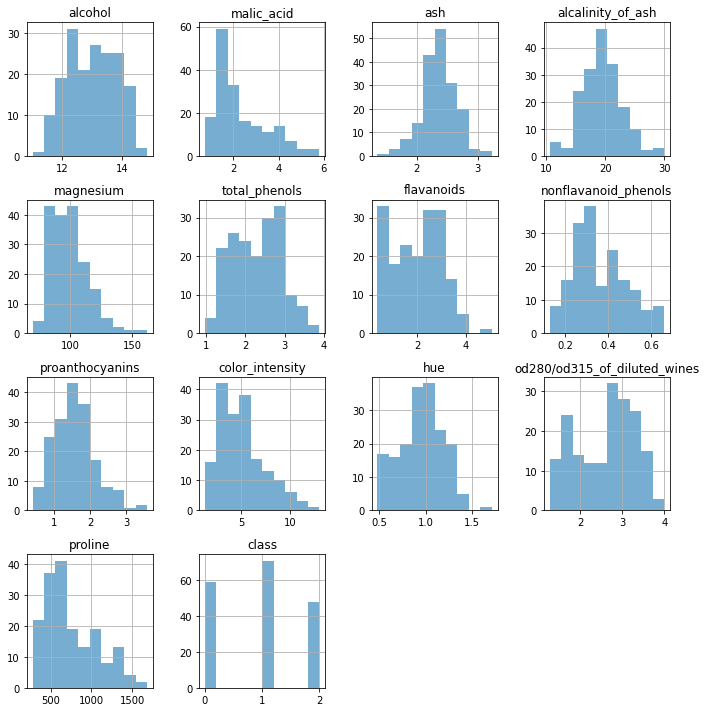

In [9]:
# 直方圖 histograms

df_wine.hist(alpha=0.6, figsize=(10, 10))
plt.tight_layout()
plt.show()

# **核密度估計Kernel Density Estimation(KDE)**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae13174a90>,
      dtype=object)

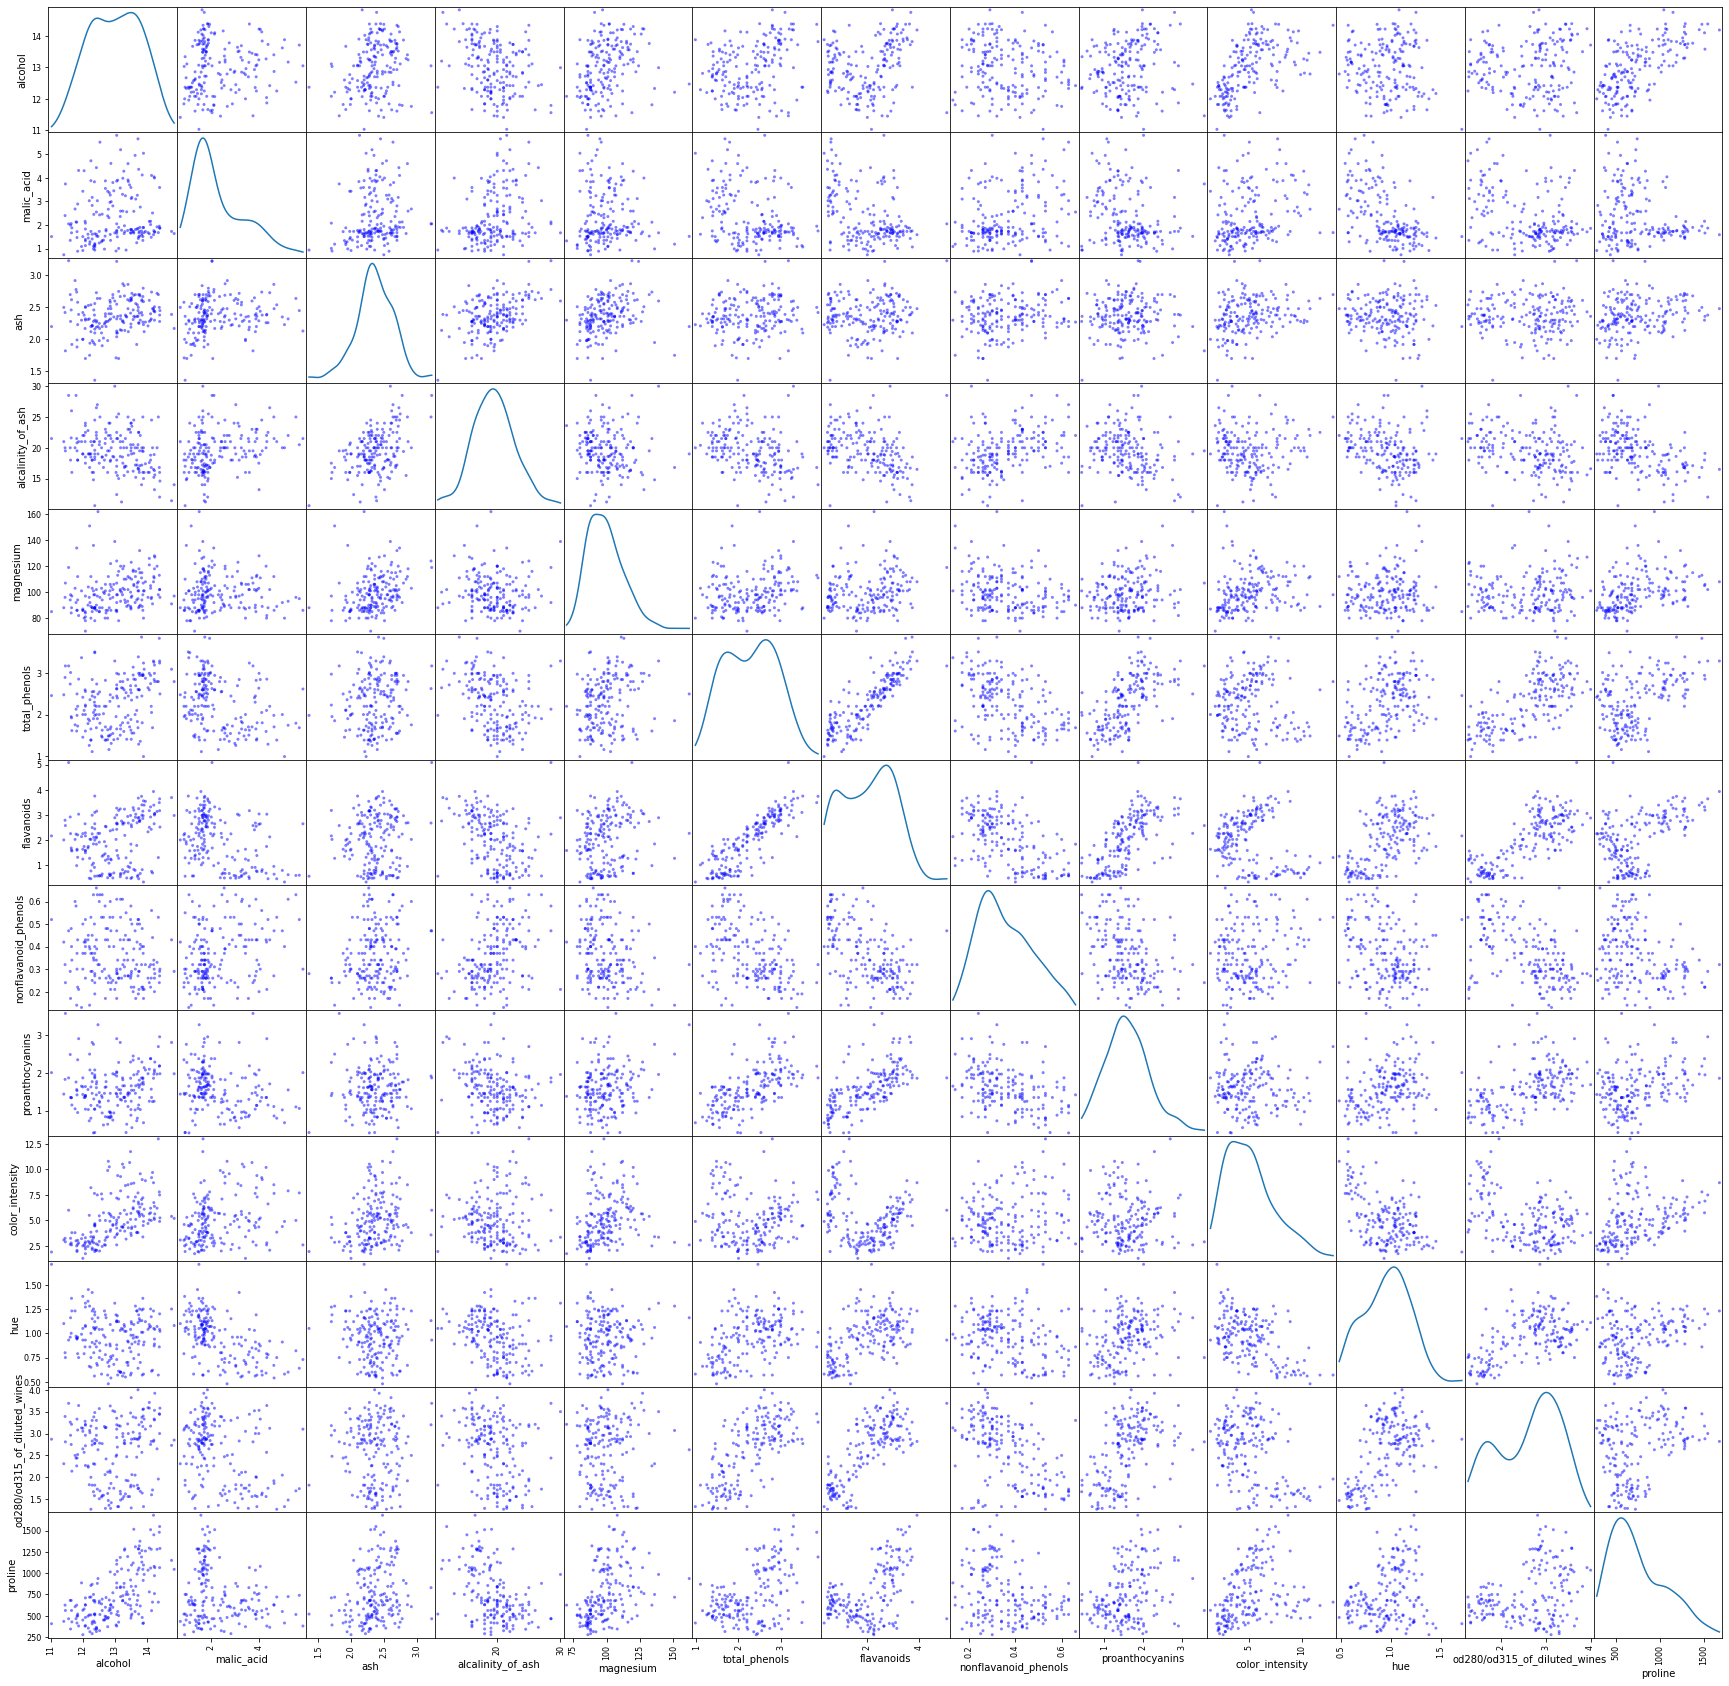

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_wine.drop('class',axis = 1),figsize=(30, 30),color='b',diagonal='kde')

In [16]:
sns.pairplot(df_wine, hue="class", height=3, diag_kind="kde") #經測試 用class顏色會較相近 object會較鮮豔

Output hidden; open in https://colab.research.google.com to view.

In [18]:
df_train_seaborn = df_wine
sns.pairplot(df_train_seaborn, hue="class", height=3, diag_kind="kde") #經測試 用class顏色會較相近 object會較鮮豔

Output hidden; open in https://colab.research.google.com to view.

# **關聯分析 (correlation map)**

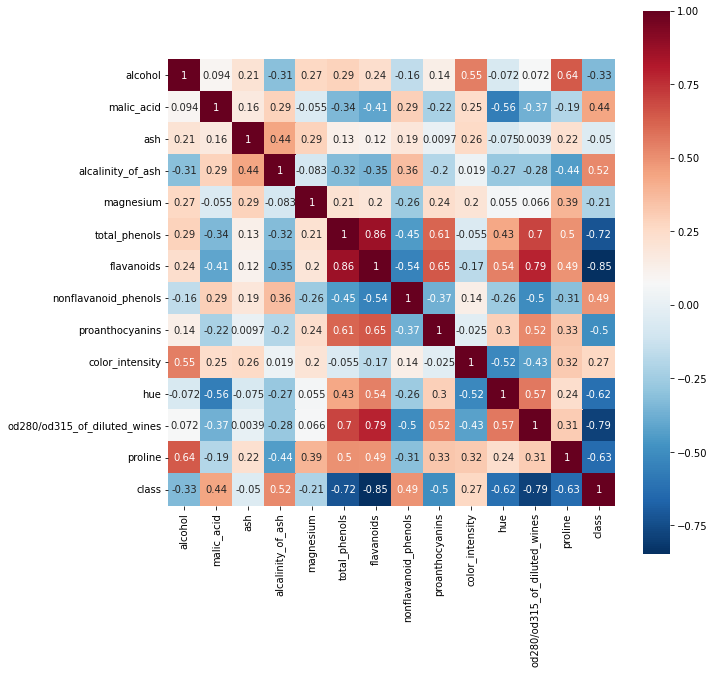

In [19]:
# correlation calculate
corr = df_wine[['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline','class']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"

# **散佈圖**

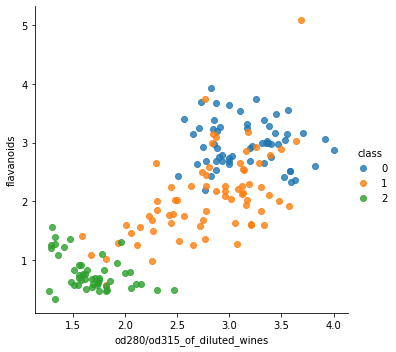

In [20]:
sns.lmplot(x = "od280/od315_of_diluted_wines", y = "flavanoids", hue='class', data=df_wine, fit_reg=False)

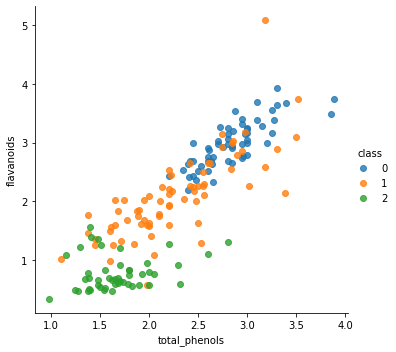

In [22]:
sns.lmplot(x = "total_phenols", y = "flavanoids", hue='class', data=df_wine, fit_reg=False)

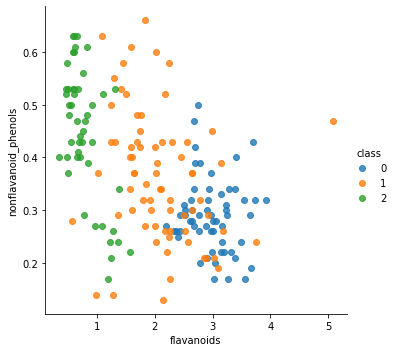

In [24]:
sns.lmplot(x = "flavanoids", y = "nonflavanoid_phenols", hue='class', data=df_wine, fit_reg=False)

# **箱形圖**
透過箱形圖可以分析每個特徵的分布狀況以及是否有離群值

Text(0.5, 1.0, 'class')

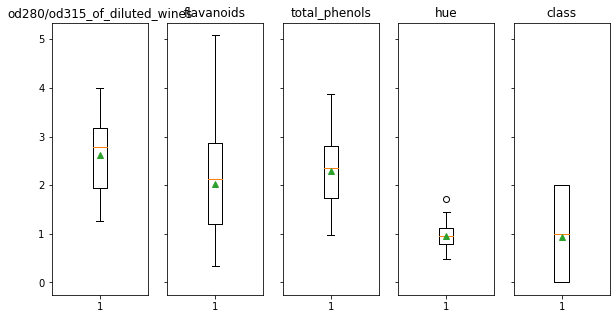

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,5), sharey=True)
axes[0].boxplot(df_wine['od280/od315_of_diluted_wines'],showmeans=True)
axes[0].set_title('od280/od315_of_diluted_wines')

axes[1].boxplot(df_wine['flavanoids'],showmeans=True)
axes[1].set_title('flavanoids')

axes[2].boxplot(df_wine['total_phenols'],showmeans=True)
axes[2].set_title('total_phenols')

axes[3].boxplot(df_wine['hue'],showmeans=True)
axes[3].set_title('hue')

axes[4].boxplot(df_wine['class'],showmeans=True)
axes[4].set_title('class')

# **分布狀態**

使用的是 displot 函數，可能是因為你未指定在繪圖時使用的分佈為連續分佈。

在 displot 函數中，你可以使用 kde 參數來控制是否顯示核密度估計。如果要在繪圖時顯示連續分佈，你可以將 kde 參數設置為 True
---------------------------------------------------------------------------------------------


在 Seaborn 的最新版本中，distplot 函數已被標記為過時，並將在未來的版本中被刪除。因此，你在使用 distplot 函數時會收到警告。

你可以使用 displot 函数替代 distplot 函數，以實現相似的功能。



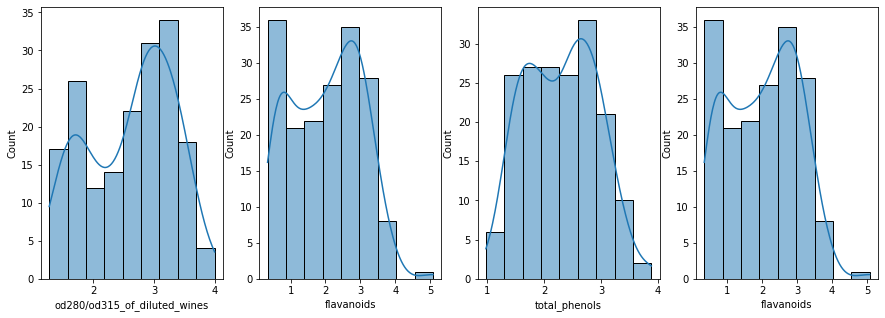

In [38]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 5)
sns.histplot(df_wine["od280/od315_of_diluted_wines"][:],kde=True,ax=axes[0])
sns.histplot(df_wine["flavanoids"][:],kde=True,ax=axes[1])
sns.histplot(df_wine["total_phenols"][:],kde=True,ax=axes[2])
sns.histplot(df_wine["flavanoids"][:],kde=True,ax=axes[3])



# axes[0].set(xlabel='od280/od315_of_diluted_wines',title="distribution of od280/od315")
# axes[1].set(xlabel='flavanoids',title="distribution of flavanoids")
# axes[2].set(xlabel='total_phenols',title="distribution of total_phenols")
# axes[3].set(xlabel='flavanoids',title="distribution of flavanoids")

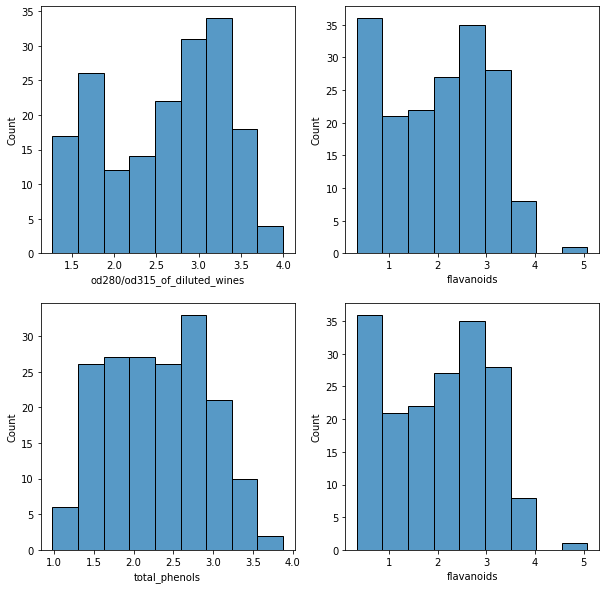

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2)

sns.histplot(data=df_wine, x='od280/od315_of_diluted_wines', ax=axes[0, 0])
sns.histplot(data=df_wine, x='flavanoids', ax=axes[0, 1])
sns.histplot(data=df_wine, x='total_phenols', ax=axes[1, 0])
sns.histplot(data=df_wine, x='flavanoids', ax=axes[1, 1])

#子圖
# sns.histplot(data=df_wine, x='class', ax=axes[1, 1])
fig.set_size_inches(10, 10) #調整大小



# **檢查缺失值**
使用 numpy 所提供的函式來檢查是否有 NA 缺失值，假設有缺失值使用dropna()來移除。使用的時機在於當只有少量的缺失值適用，若遇到有大量缺失值的情況，或是本身的資料量就很少的情況下建議可以透過機器學習的方法補值來預測缺失值。

In [46]:
X = df_wine.drop(labels=['class'],axis=1).values # 移除class
# checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


# **切割訓練集與測試集**

In [47]:
from sklearn.model_selection import train_test_split #自動打亂順序
X = df_wine.drop(labels=['class'],axis=1)
y = df_wine['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 27)


In [ ]:
#X_train

In [48]:
print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

Training data shape: (124, 13)
Testing data shape: (54, 13)


## 建立 Logistic regression 模型
羅輯回歸是由線性回歸變化而來的，屬判別模型適合解決二元分類問題。

Parameters:
- penalty: 正規化l1/l2，防止模型過度擬合。
- C: 數值越大對 weight 的控制力越弱，預設為1。
- n_init: 預設為10次隨機初始化，選擇效果最好的一種來作為模型。
- solver: 優化器的選擇。newton-cg,lbfgs,liblinear,sag,saga。預設為liblinear。
- max_iter: 迭代次數，預設為100代。
- class_weight: 若遇資料不平衡問題可以設定balance，預設=None。
- random_state: 亂數種子僅在solver=sag/liblinear時有用。

Attributes:
- coef_: 取得斜率。
- intercept_: 取得截距。

Methods:
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- predict_proba: 預測每個類別的機率值。
- score: 預測成功的比例。

在使用 sklearn 中的 LogisticRegression 模型時，multi_class 參數用於指定多類別分類任務的處理方式。

multi_class 參數支持以下幾種值：

'ovr'：One-vs-Rest，也稱為 One-vs-All。在這種情況下，模型會被訓練成對每個類別建立一個二元分類器，並將所有的二元分類器的結果進行投票，最終預測出樣本屬於哪一類。
'multinomial'：多類別分類任務會被轉化為多個二元分類任務，每個二元分類任務都是將某一類與其他類別區分開來。

In [54]:
from sklearn.linear_model import LogisticRegression

# 建立多類別邏輯斯回歸模型
logistic_model = LogisticRegression(multi_class='ovr', max_iter=1000)

# 訓練模型
logistic_model.fit(X_train, y_train)

# 在測試集上評估模型
accuracy = logistic_model.score(X_test, y_test)

# **使用Score評估模型**

In [55]:
# 預測成功的比例
print('訓練集: ',logistic_model.score(X_train,y_train))
print('測試集: ',logistic_model.score(X_test,y_test))

訓練集:  0.9838709677419355
測試集:  0.9814814814814815


# **使用混淆矩陣**

In [56]:
from sklearn.metrics import confusion_matrix
y_pred = logistic_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[15  0  0]
 [ 0 20  0]
 [ 0  1 18]]


顏色可以查[`這裡`](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
plot_color_gradients('Sequential',
                     ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])

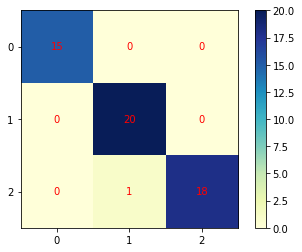

In [57]:
# 繪製混淆矩陣
plt.imshow(confusion_mat, cmap='YlGnBu') #binary白色黑色

# 顯示顏色對應的數值
plt.colorbar()

# 添加標籤
plt.xticks([0, 1, 2])
plt.yticks([0, 1, 2])

# 在圖片上添加文本
for i in range(3):
    for j in range(3):
        plt.text(j, i, confusion_mat[i, j], ha='center', va='center', color='red')

plt.show()

把模型存下來


In [ ]:
# from sklearn import joblib

# # 將模型保存到文件中
# joblib.dump(logistic_model, 'logistic_model.pkl')

# # 從文件中載入模型
# loaded_model = joblib.load('logistic_model.pkl')

In [ ]:
!pip install -U scikit-learn
!pip install joblib
from sklearn import joblib
from google.colab import drive
drive.mount('/content/gdrive')

# 将模型保存到 Google Drive 上

joblib.dump(logistic_model, '/content/drive/MyDrive/logistic_model.pkl')

In [ ]:
# 從 Google Drive 中載入模型
loaded_model = joblib.load( '/content/drive/MyDrive/logistic_model.pkl')

In [75]:
import sklearn
print(sklearn.__path__)

['/usr/local/lib/python3.8/dist-packages/sklearn']
